In [22]:
import tdgl

In [23]:
import light_sources.laguerre_gaussian_beam as lg

In [24]:
import numpy

In [25]:
import os
import tempfile

os.environ["OPENBLAS_NUM_THREADS"] = "1"

from IPython.display import HTML, display
import h5py
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5, 4)

import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation

In [26]:
MAKE_ANIMATIONS = True

In [27]:
tempdir = tempfile.TemporaryDirectory()

In [28]:
def make_video_from_solution(
    solution,
    quantities=("order_parameter", "phase"),
    fps=20,
    figsize=(5, 4),
):
    """Generates an HTML5 video from a tdgl.Solution."""
    with tdgl.non_gui_backend():
        with h5py.File(solution.path, "r") as h5file:
            anim = create_animation(
                h5file,
                quantities=quantities,
                fps=fps,
                figure_kwargs=dict(figsize=figsize),
            )
            video = anim.to_html5_video()
        return HTML(video)

In [33]:
p, l, s, L, E_amp, solve_time = 0, 1, -1, 10, 20, 10

In [37]:
### Initialize parameters

if s==0: PolType = 'l_x'
if s==1: PolType = 'c_l'
if s==-1: PolType = 'c_r'
xi = 0.1

P = lg.input_value(

    # Unit in the system

    length_units = "um", # SI: m
    time_units = 'ps', # SI: s
    current_units = "mA", # SI: A
    mass_units = 'kg', # SI: kg
    angular_freq_units = 'THz', # SI: 1/s # for demonstration
    field_units = "mT", # SI: kg/s^2/A
    E_field_units = "kvolt/meter", # newton per coulomb (N/C), or volt per meter (V/m), SI: kg*m^2/s^3/A
    resistivity_units = 'ohm * cm',

    # Properties of SC

    xi = xi, # Coherent length
    london_lambda = 0.1, # London penetration depth
    gamma = 10, # Strength of inelastic scattering
    height = L*xi, # Height of sample
    width = L*xi, # Width of sample
    thickness = 2/1000, # Thickness of sample
    temperature = 0.99, # Temperature, Unit of Tc
    resistivity = 150e-6, # Conductivity of normal state

    # Properties of linearly polarized Gaussian beam

    E_amp = E_amp, # Input amplitude of electric field (unit:A0*w_GL)
    w_EM = 2*np.pi / 10, # Angular frequency of light (unit:w_GL)
    w_0 = 0.4, # Radius of spot of Gaussian beam
    xc_Gauss = 0, # Center position of Gaussian beam
    yc_Gauss = 0, # Center position of Gaussian beam
    light_source_type = 'LG'+str(int(p))+str(int(l))+'_'+PolType, # Setting of light source by keyword.
    # ''' Options of light_source_type:
    # "None", "LGpl_l_x" (linearly polarized beam along x of mode LGpl), "LGpl_l_y" (linearly polarized beam along y of mode LGpl),
    # "LGpl_c_l" (left-handed circularly polarized beam of mode LGpl), "LGpl_c_r" (right-handed circularly polarized beam of mode LGpl),
    #  ***If the variable light_source_type is "None":
    #     We need to imput the specific conditions of quantum numbers and polarization.
    #     Default: p=0 (int), l=0 (int), s=0 (float or int), phi0_xy=0 (float or int)
    #     Reference of quantum numbers and polarization: TABLE I in ref[3].
    # '''

    # Settings of running simulation

    screenSet = False, # Setting of screening effect
    solve_time = solve_time, # Total solving time (Unit: tau_GL)

    # Settings of figures

    quiver_mesh_n = 30, # Plot of E (quiver): mesh number
    quiver_scale = 6.0, # Plot of E (quiver): quier scale
    width_quiver = 0.2, # Plot of E (quiver): quiver width
    dpi = 100, # Dpi of figure
)

''' Done. '''

' Done. '

In [8]:
preview_show = True


 *** Demonstration of selected parameters:
Conductivity (1/resistivity): 6666.666666666666 / centimeter / ohm
|E0| of light: 7856.826487042432 kilovolt / meter
Quantum number of orbital angular momentum (l): 1
Quantum number of spin angular momentum (s): -1

 *** Demonstration of selected dimentions:
Characteristic timescale (tau_GL): 0.008377580414133334 picosecond
Characteristic rate (1/tau_GL): 119.36620725394143 terahertz
Bc2 of SC (mu0Hc2): 32.91059784754533 millitesla
Unit vector potential A0 (xi*Bc2): 3.2910597847545335 micrometer * millitesla
Unit current density (J0 = 4*xi*Bc2/mu_0/lambdaL**2): 1047.5768649389909 milliampere / micrometer ** 2
Unit of electric field E0_GL (A0*f_GL): 392.8413243521215 micrometer * millitesla / picosecond

 *** TABLE: The parameters of superconductor mentioned in TABLE II in the reference [2].


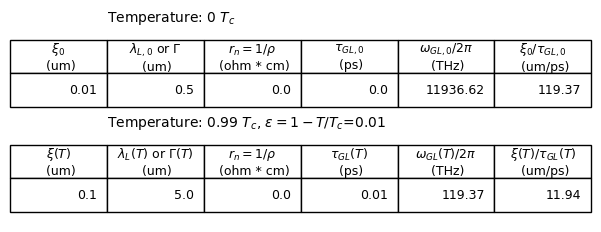

In [35]:
## Print out the inputs. Print the selected parameters, or use "P.print_properties(['All'])" to print all parameters.

if preview_show:

    print('\n *** Demonstration of selected parameters:')
    P.print_properties(['Conductivity','E_amp','s','l'])
    print('\n *** Demonstration of selected dimentions:')
    P.print_properties(['tau_gl','f_gl','Bc2','A0','J0','E0_GL'])
    print('\n *** TABLE: The parameters of superconductor mentioned in TABLE II in the reference [2].')
    TAB = lg.printTAB(P)

## Example of update parameter(s) and check

# P.set_state(E_amp = 8, p=1,)
# P.print_properties(['E0','E_amp','p'])
# P.print_properties(['All'])

/Users/hennadii/Documents/GitHub/s-to-p/light_sources/laguerre_gaussian_beam.py:784: UserWarning: linewidths is ignored by contourf
  contour_Bz = ax2.contourf(Xv, Yv, B_z, levels=50, linewidths=0.0, cmap="PRGn",vmin=Bzmin,vmax=Bzmax)


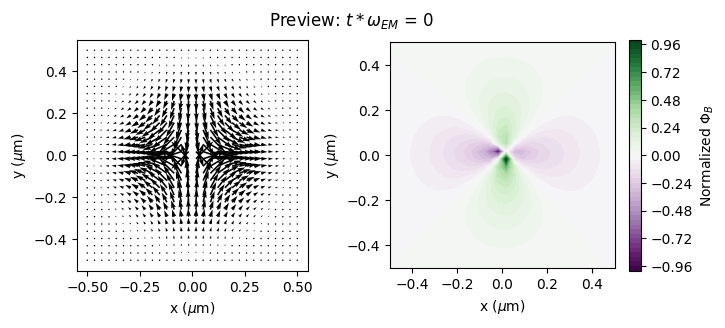

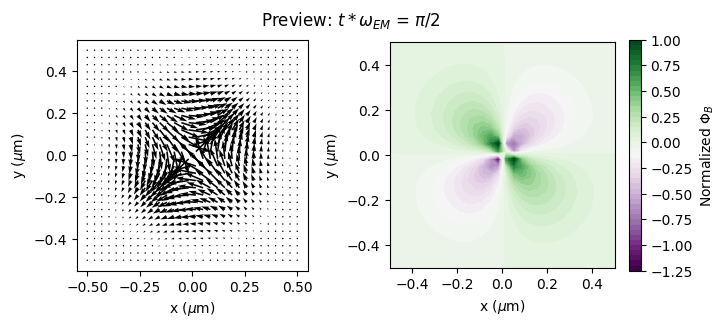

In [36]:
if preview_show:

        title_set = 'Preview: $t*\\omega_{EM}$ = 0'
        ti = 0
        E_x, E_y = P.E_input_frame(ti,take_real=False)
        B_x, B_y, B_z = lg.E2Bv(P.Xv,P.Yv,E_x,E_y,P.constant_Bz,P.c,P.w_EM)
        Phi_B = B_z*np.pi*P.w_0**2
        lg.plot_EM(P.X,P.Y,np.real(E_x),np.real(E_y),np.real(Phi_B/Phi_B.max()),title=title_set,
                   figsize=(8,3),scale=P.quiver_scale,dpi=P.dpi,width_quiver=P.width_quiver)

        title_set = 'Preview: $t*\\omega_{EM}$ = $\\pi$/2'
        ti = (2*np.pi/4) / P.w_EM
        E_x, E_y = P.E_input_frame(ti,take_real=False)
        B_x, B_y, B_z = lg.E2Bv(P.Xv,P.Yv,E_x,E_y,P.constant_Bz,P.c,P.w_EM)
        Phi_B = B_z*np.pi*P.w_0**2
        lg.plot_EM(P.X,P.Y,np.real(E_x),np.real(E_y),np.real(Phi_B/Phi_B.max()),title=title_set,
                   figsize=(8,3),scale=P.quiver_scale,dpi=P.dpi,width_quiver=P.width_quiver)

In [10]:
length_units = "um"
# Material parameters
xi = 0.5
london_lambda = 2
d = 0.1
layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=1)

# Device geometry
total_width = 5
total_length = total_width
# Outer geometry of the film
film = (
    tdgl.Polygon("film", points=box(total_width, total_length))
    #.difference(right_notch, left_notch)
    .resample(401)
    .buffer(0)
)

In [11]:
device = tdgl.Device(
    "weak_link",
    layer=layer,
    film=film,
    #holes=[round_hole, square_hole],
    #terminals=[source, drain],
    #probe_points=probe_points,
    length_units=length_units,
)

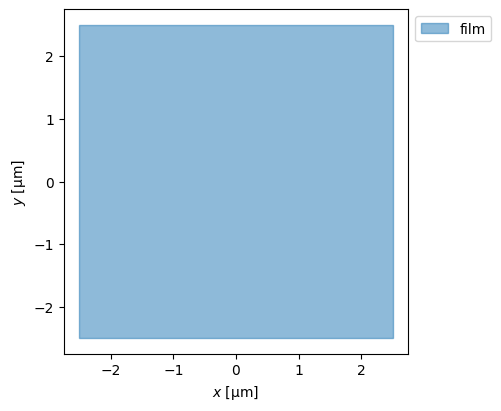

In [12]:
fig, ax = device.draw()

In [13]:
device.make_mesh(max_edge_length=xi / 2, smooth=100)

Constructing Voronoi polygons: 100%|█████| 2226/2226 [00:00<00:00, 21181.48it/s]


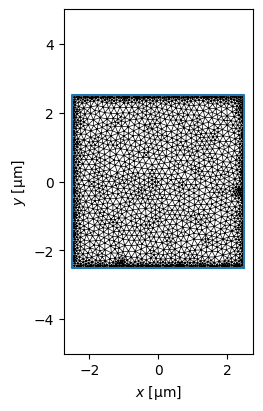

In [14]:
fig, ax = device.plot(mesh=True, legend=False)
_ = ax.set_ylim(-5, 5)

In [20]:
device.mesh_stats()

num_sites,2226
num_elements,4050
min_edge_length,3.127e-02
max_edge_length,2.329e-01
mean_edge_length,1.097e-01
min_area,5.864e-04
max_area,3.364e-02
mean_area,1.123e-02
coherence_length,5.000e-01
length_units,um


In [15]:
options = tdgl.SolverOptions(
    # Allow some time to equilibrate before saving data.
    skip_time=0,
    solve_time=150,
    output_file=os.path.join(tempdir.name, "weak-link-zero-field.h5"),
    field_units = "mT",
    current_units="uA",
    save_every=100,
)
# If you do not provide an applied_vector_potential, tdgl defaults to zero applied field.
zero_field_solution = tdgl.solve(
    device,
    options,
    # terminal_currents must satisfy current conservation, i.e.,
    # sum(terminal_currents.values()) == 0.
    #terminal_currents=dict(source=12, drain=-12),
    applied_vector_potential=0.5,
)

Simulating: 100%|██████████████████████████▉| 150/150 [00:06<00:00, 21.92tau/s ]


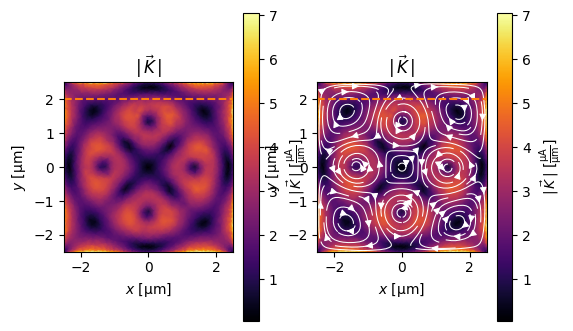

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

_ = zero_field_solution.plot_currents(ax=axes[0], streamplot=False)
_ = zero_field_solution.plot_currents(ax=axes[1])
# Define the coordinates at which to evaluate the sheet current density
x = np.linspace(-total_width / 2, total_width / 2, 401)
y = 2 * np.ones_like(x)
cross_section = np.array([x, y]).T
for ax in axes:
    _ = ax.plot(x, y, "C1--")

In [17]:
current = zero_field_solution.current_through_path(cross_section)
print(f"Measured current: {current:.3f~P}")

Measured current: -0.017 µA


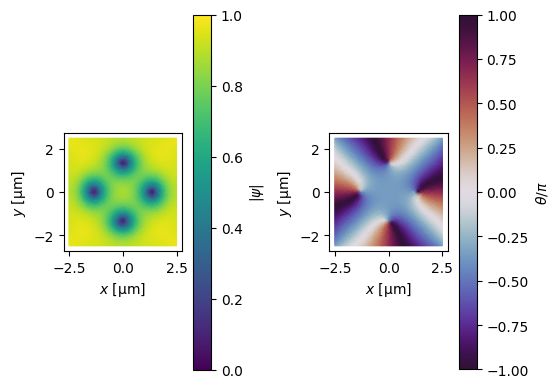

In [18]:
# Plot a snapshot of the order parameter in the middle of a phase slip
t0 = 112
zero_field_solution.solve_step = zero_field_solution.closest_solve_step(t0)
fig, axes = zero_field_solution.plot_order_parameter(figsize=(5.5, 4))

ValueError: No voltage data available.

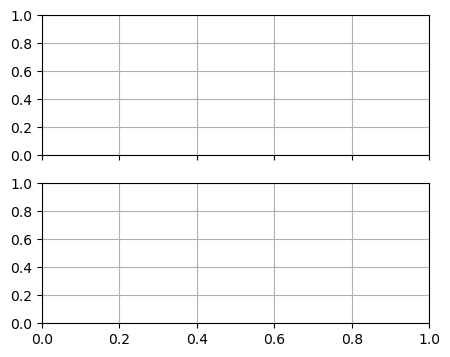

In [26]:
fig, axes = zero_field_solution.dynamics.plot()
for ax in axes:
    ax.axvline(t0, color="k", alpha=0.5)

ValueError: No voltage data available.

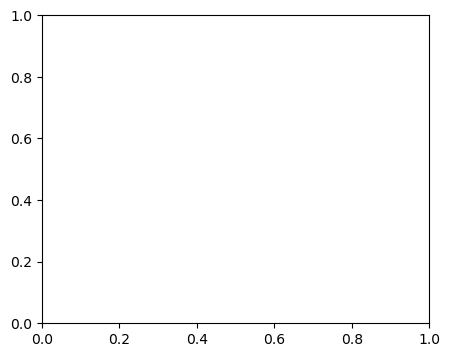

In [27]:
dynamics = zero_field_solution.dynamics
indices = dynamics.time_slice(tmax=75)

fig, ax = plt.subplots()
# Plot the voltage on the left y axis
ax.plot(dynamics.time[indices], dynamics.voltage()[indices], "C0-")
ax.tick_params(axis="y", color="C0", labelcolor="C0")
ax.set_ylabel("Voltage, $\\Delta\\mu$ [$V_0$]", color="C0")
ax.set_xlabel("Time, $t$ [$\\tau_0$]")

# Plot the phase difference on the right y axis
bx = ax.twinx()
unwrapped_phase = np.unwrap(dynamics.phase_difference()[indices])
bx.plot(dynamics.time[indices], unwrapped_phase / np.pi, "C1")
bx.grid(axis="both")
bx.spines["right"].set_color("C1")
bx.spines["left"].set_color("C0")
bx.tick_params(axis="y", color="C1", labelcolor="C1")
_ = bx.set_ylabel("Phase difference, $\\Delta\\theta/\\pi$", color="C1")

In [33]:
if MAKE_ANIMATIONS:
    zero_field_video = make_video_from_solution(
        zero_field_solution,
        quantities=["order_parameter", "phase", "scalar_potential"],
        figsize=(6.5, 4),
    )
    display(zero_field_video)

In [47]:
film

Polygon(name='film', points=<ndarray: shape=(401, 2)>, mesh=True)

In [38]:
import tempfile
tempdir = tempfile.TemporaryDirectory()
# tempdir = os.path.join(os.getcwd(),folder_name)
Execute_GPU = False

options = tdgl.SolverOptions(
        solve_time=P.solve_time,
        field_units=P.field_units,
        current_units=P.current_units,
        include_screening=P.screenSet,
        max_iterations_per_step=200000,
        save_every=100,
        dt_max=1e-3,
        output_file=os.path.join(os.getcwd(), "SC_solution.h5"),
        gpu=Execute_GPU,
    )


### Solve device

applied_vector_potential = lg.A_LG(w=P.w_EM, w0=P.w_0, E0=P.E0i, phi0_t=P.phi0_t, phi0_xy=P.phi0_xy, c=P.c, tau=P.tau_GL,
                                p=P.p,s=P.s,l=P.l, polarization_modulation=P.polarization_modulation, xc_Gauss=P.xc_Gauss, yc_Gauss=P.yc_Gauss, t_off=P.t_off,
                                angular_freq_units=P.angular_freq_units, length_units=P.length_units, E_field_units=P.E_field_units, time_units=P.time_units,)
SC_solution = tdgl.solve(device, options, applied_vector_potential=applied_vector_potential,disorder_epsilon=P.disorder_epsilon)

''' Done.'''

Output file already exists. Renaming to /Users/hennadii/Documents/GitHub/s-to-p/SC_solution-1.h5.
Simulating: 100%|████████████████████████████▉| 10/10 [00:17<00:00,  1.72s/tau ]


' Done.'

/Users/hennadii/Documents/GitHub/s-to-p/light_sources/laguerre_gaussian_beam.py:784: UserWarning: linewidths is ignored by contourf
  contour_Bz = ax2.contourf(Xv, Yv, B_z, levels=50, linewidths=0.0, cmap="PRGn",vmin=Bzmin,vmax=Bzmax)


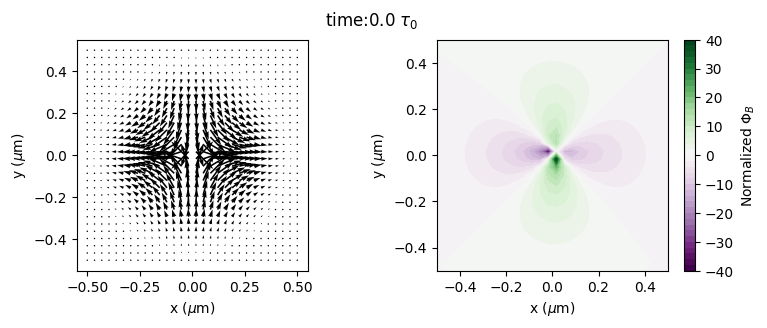

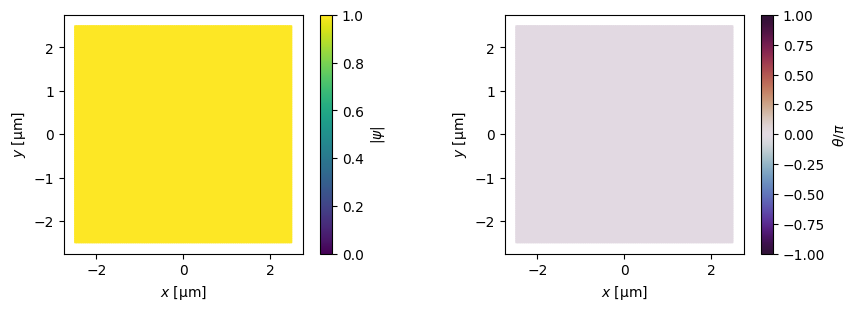

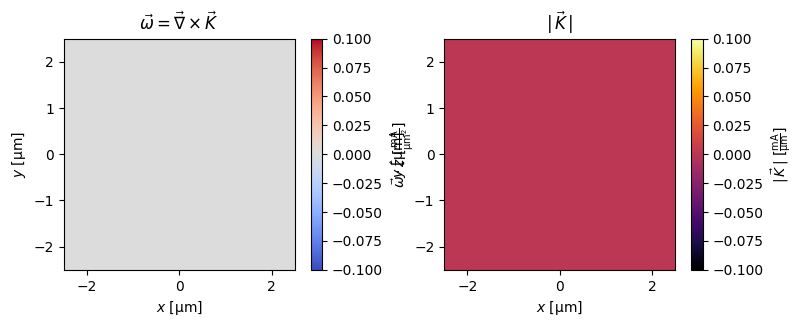

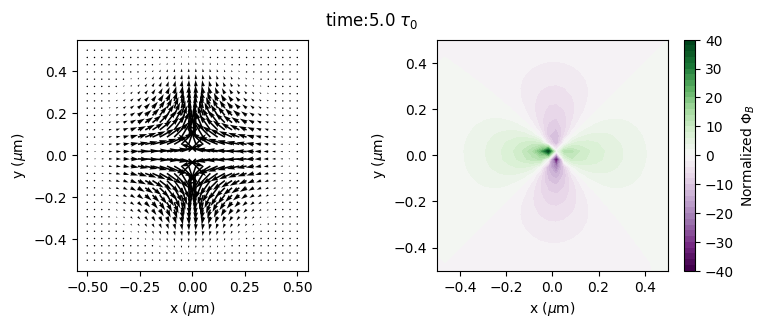

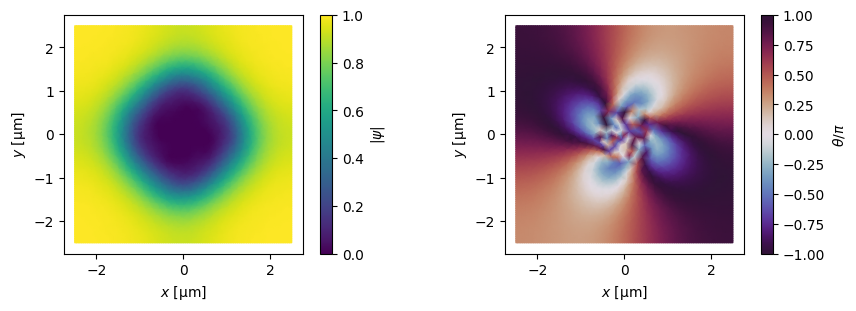

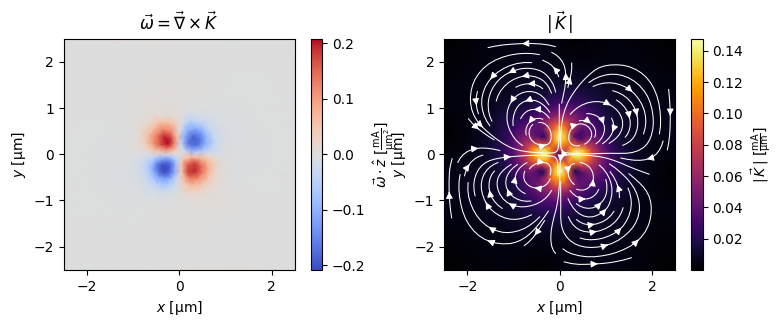

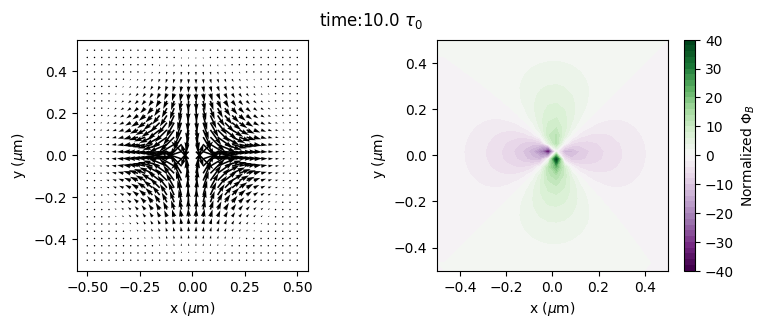

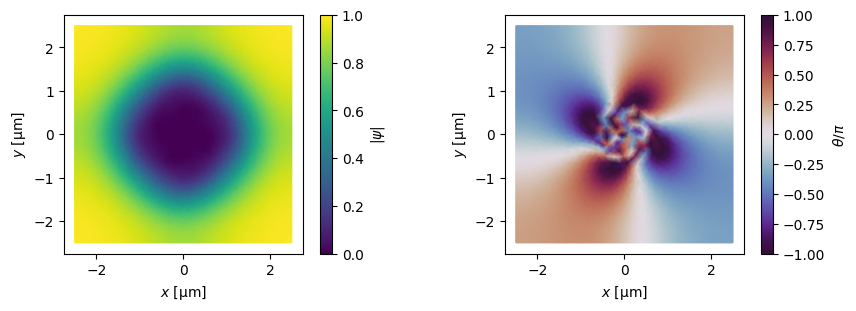

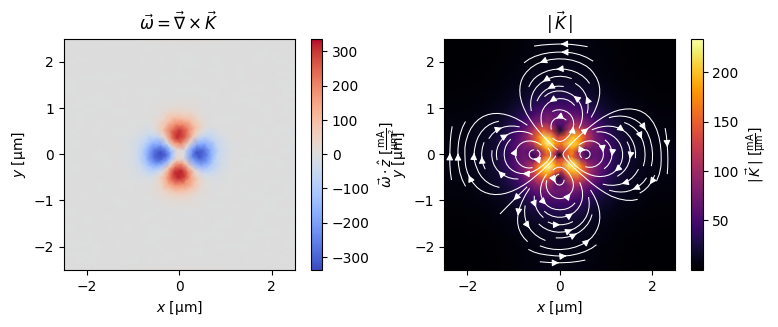

In [39]:
### Demonstrate the electrical field, order parameter, vorticity, at time in tn_set

tn_set = [0, 5, 10] # Unit of tau_GL


for nt in range(len(tn_set)):
    ti = tn_set[nt]

 ## Figures of Electric field and out-of-plan magnetic field:
    title_set = 'time:'+str(int(ti*100)/100)+' $\\tau_0$'
    E_x, E_y = P.E_input_frame(ti,take_real=False)
    B_x, B_y, B_z = lg.E2Bv(P.Xv,P.Yv,E_x,E_y,0,P.c,P.w_EM)
    lg.plot_EM(P.X,P.Y,np.real(E_x),np.real(E_y),np.real(B_z),title=title_set,figsize=(9,3),scale=P.quiver_scale,dpi=P.dpi,width_quiver=P.width_quiver)

 ## Figures of amplitude and phase of SC order parameter:
    SC_solution.solve_step = SC_solution.closest_solve_step(ti)
    fig, axes = SC_solution.plot_order_parameter(figsize=(9, 3),dpi=P.dpi)

 ## Figures of vorticity of induced current and current density:
    fig, axes = plt.subplots(1, 2, figsize=(9, 3),dpi=P.dpi)
    _ = SC_solution.plot_vorticity(ax=axes[0]) #, streamplot=False
    _ = SC_solution.plot_currents(ax=axes[1]) #, streamplot=False

In [40]:
from light_sources.make_video import make_video_from_solution

MAKE_ANIMATIONS = True

if MAKE_ANIMATIONS:
        output_video = make_video_from_solution(
            SC_solution,
            P,
            quantities=["order_parameter","phase","vorticity"],
            figsize=(18, 4),
            fps=20,
            dpi=P.dpi,
        )
        display(output_video)